# Traffic sign classifier

![alt text](classifier.png)


---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Load training validation and testing data
# Data has been provided under ../data/ folder
training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Fetch the features and labels
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

We are using python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. 
<br> <b>Note</b>:
For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
#Import the libraries
import pandas as pd
import numpy as np

### Function to transform numerical data into corresponding string

In [3]:
signnames = pd.read_csv('./signnames.csv')
signnames.set_index('ClassId',inplace=True)

# Helper function to transform a numeric label into string
def get_name_from_label(label):
    return signnames.loc[label].SignName

### Description of the dataset

In [4]:
# Traning examples
n_train = X_train.shape[0]

# Validation examples
n_validation = X_valid.shape[0]

# Testing examples.
n_test = X_test.shape[0]

# Shape of an traffic sign image
image_shape = X_train.shape[1:]

# Unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("No of training examples =", n_train)
print("No of validation examples =", n_validation)
print("No of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

No of training examples = 34799
No of validation examples = 4410
No of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Visualization of the dataset

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [6]:
counter = Counter(y_train)
print("Train example per class mean {} min {} max {}".format(int(np.mean(list(Counter(y_train).values()))),
                                                    np.min(list(Counter(y_train).values())) ,
                                                    np.max(list(Counter(y_train).values())) ))
print()
print("Most common signs:")
for el in counter.most_common(10):
    print("'{}'".format(get_name_from_label(el[0])),' train samples: {}'.format(el[1]))
print()
print("Most rare signs:")
for el in sorted(counter.items(),key=lambda x: x[1])[:10]:
    print("'{}'".format(get_name_from_label(el[0])),' train samples: {}'.format(el[1]))

Train example per class mean 809 min 180 max 2010

Most common signs:
'Speed limit (50km/h)'  train samples: 2010
'Speed limit (30km/h)'  train samples: 1980
'Yield'  train samples: 1920
'Priority road'  train samples: 1890
'Keep right'  train samples: 1860
'No passing for vehicles over 3.5 metric tons'  train samples: 1800
'Speed limit (70km/h)'  train samples: 1770
'Speed limit (80km/h)'  train samples: 1650
'Road work'  train samples: 1350
'No passing'  train samples: 1320

Most rare signs:
'Go straight or left'  train samples: 180
'Dangerous curve to the left'  train samples: 180
'Speed limit (20km/h)'  train samples: 180
'End of no passing'  train samples: 210
'End of no passing by vehicles over 3.5 metric tons'  train samples: 210
'End of all speed and passing limits'  train samples: 210
'Pedestrians'  train samples: 210
'Bicycles crossing'  train samples: 240
'Road narrows on the right'  train samples: 240
'Keep left'  train samples: 270


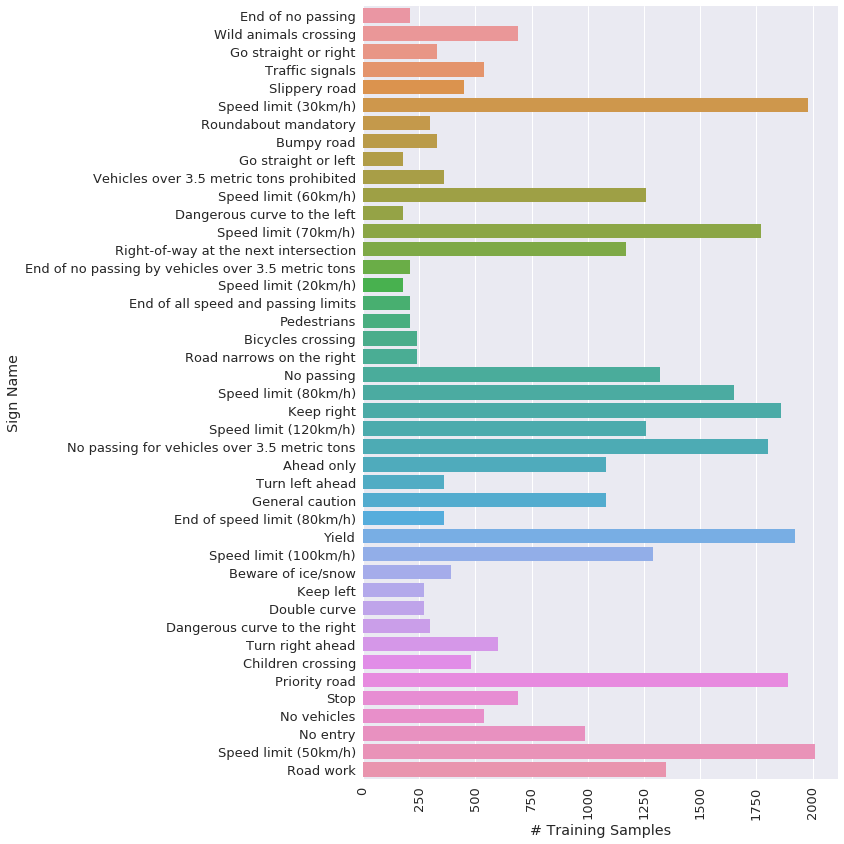

In [7]:
counts = pd.DataFrame(columns=['sign_label','training_samples_count'],
                      data=[(label, count) for label, count in counter.items()])
counts['sign'] = counts.sign_label.apply(get_name_from_label)

plt.figure(figsize=(12,12))
sns.set(font_scale=1.3)
sns.barplot(x='training_samples_count',y='sign',data=counts,orient='o')
plt.xticks(rotation=90)
plt.ylabel('Sign Name')
plt.xlabel('# Training Samples');
plt.tight_layout()
plt.savefig('plots/training_set_counts.png')

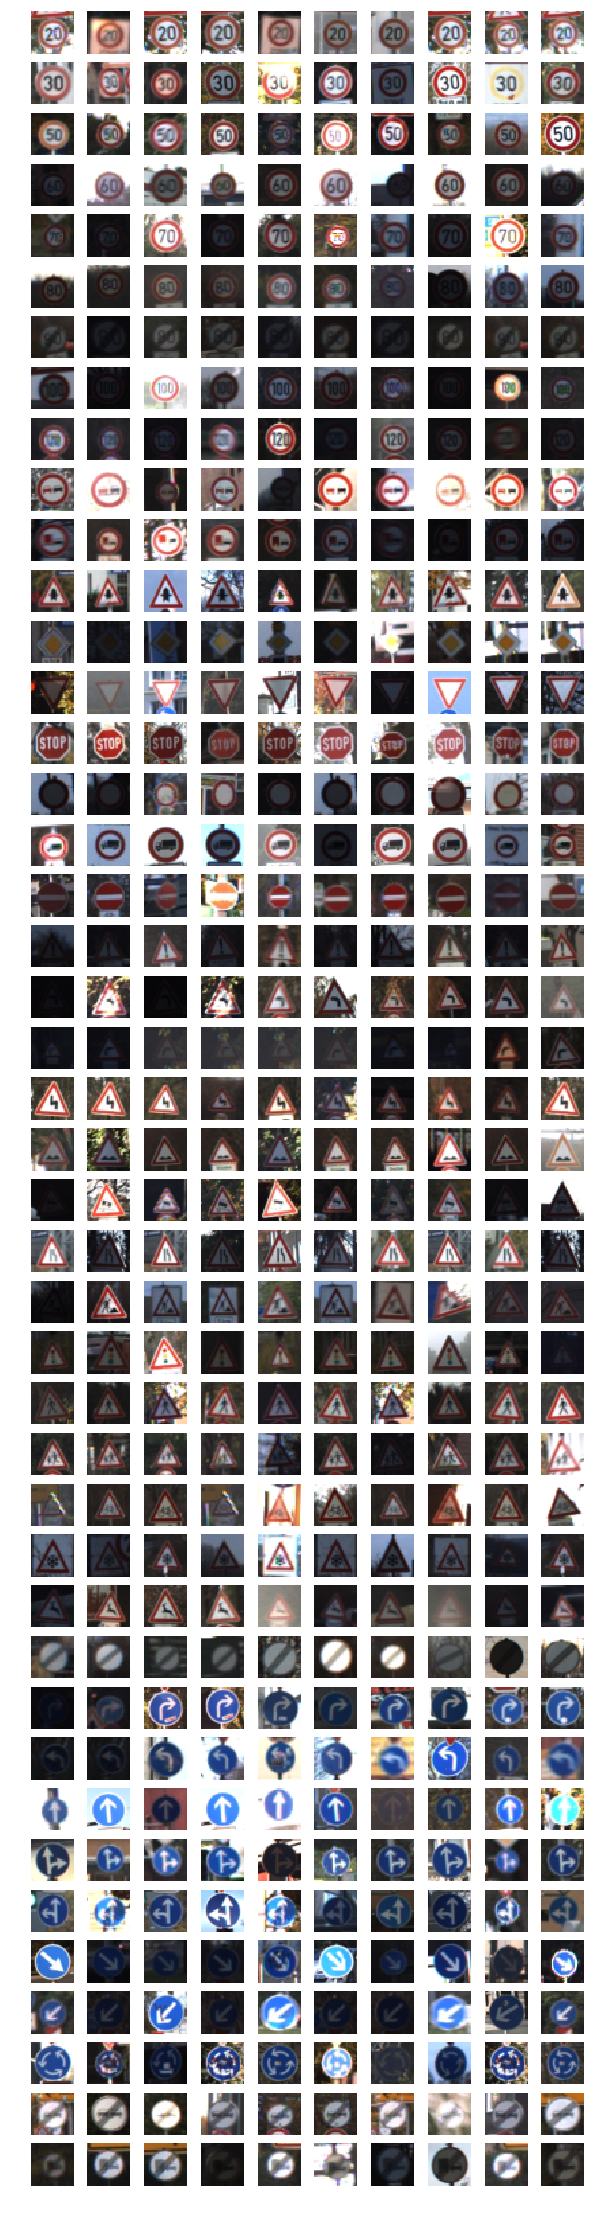

In [8]:
def get_random_samples(n_max=1):
    selected = list()
    
    for current_label in range(43):
        found=0
        while found<n_max:
            ii = np.random.randint(len(y_train))
            
            if current_label == y_train[ii]:
                selected.append(ii)
                found+=1


    assert len(selected) ==  43*n_max
    return list(selected)
plt.figure(figsize=(10,40))
count=0
cols = 10
for ii in get_random_samples(cols):
    count+=1
    plt.subplot(43,cols,count)
    plt.imshow(X_train[ii])
    plt.axis('off')
# plt.tight_layout()
plt.savefig('plots/random_examples.png',bbox_inches='tight')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

In [9]:
import cv2

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [10]:
img_size = 32

def sharpen_img(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)

def transform_img(img_in):
    img_in = img_in.copy()
    img_out= sharpen_img(img_in)
    img_out = cv2.cvtColor(img_in, cv2.COLOR_RGB2YUV)

    img_out[:,:,0] = cv2.equalizeHist(img_out[:,:,0])
#     img_out[:,:,1] = cv2.equalizeHist(img_out[:,:,1])
#     img_out[:,:,2] = cv2.equalizeHist(img_out[:,:,2])
    
    return img_out[:,:,0]

def random_rotate_img(img):
    c_x,c_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = 30.0*np.random.rand()-15
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    return cv2.warpAffine(img, Mat, img.shape[:2])

def random_scale_img(img):
    img2=img.copy()
    sc_y=0.4*np.random.rand()+1.0
    img2=cv2.resize(img, None, fx=1, fy=sc_y, interpolation = cv2.INTER_CUBIC)
    
    dy = int((img2.shape[1]-img.shape[0])/2)
    end = img.shape[1]-dy
    img2 = img2[dy:end,:,:]
    assert img2.shape[0] == 32
#     print(img2.shape,dy,end)
    return img2

#Compute linear image transformation ing*s+m
def lin_img(img,s=1.0,m=0.0):
    img2=cv2.multiply(img, np.array([s]))
    return cv2.add(img2, np.array([m]))

#Change image contrast; s>1 - increase
def contr_img(img, s=1.0):
    m=127.0*(1.0-s)
    return lin_img(img, s, m)


def augment_img(img):
    img = img.copy()
    img=contr_img(img, 1.8*np.random.rand()+0.2)
    img=random_rotate_img(img)
    img=random_scale_img(img)

    return transform_img(img)


(32, 32)


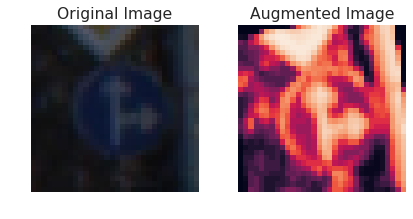

In [11]:
img = X_train[1000]
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.axis('off')
out = augment_img(img)
print(out.shape)
plt.imshow(out)
plt.title('Augmented Image')
plt.tight_layout()
plt.savefig('plots/augmented_img_example.png',bbox_inches='tight')

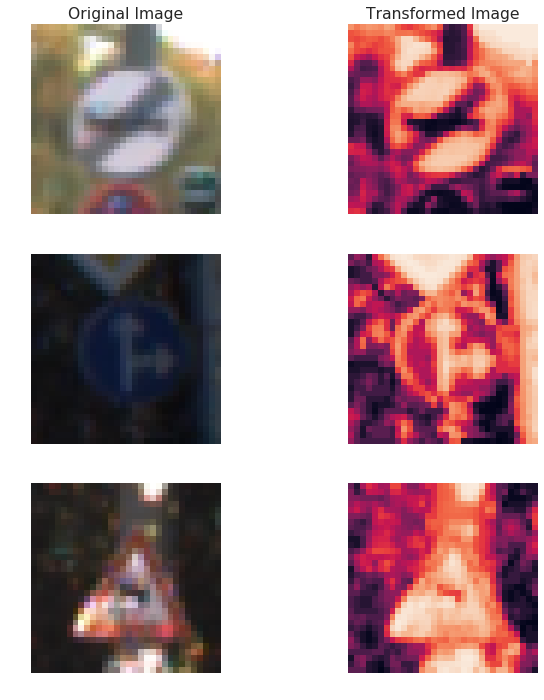

In [12]:
plt.figure(figsize=(10,10))
img = X_train[100]
plt.subplot(3,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.subplot(3,2,2)
plt.axis('off')
plt.imshow(transform_img(img))
plt.title('Transformed Image')


img = X_train[1000]
plt.subplot(3,2,3)
plt.imshow(img)
plt.axis('off')
plt.subplot(3,2,4)
plt.axis('off')
plt.imshow(transform_img(img))

img = X_train[2190]
plt.subplot(3,2,5)
plt.imshow(img)

plt.axis('off')
plt.subplot(3,2,6)
plt.axis('off')
plt.imshow(transform_img(img))
plt.tight_layout()
plt.savefig('plots/image_transformations.png',bbox_inches='tight')

In [13]:
# Transform all images and augment training data
X_train_transf = list()
y_train_transf = list()
X_test_transf = list()
X_valid_transf = list()
for ii in range(X_train.shape[0]):
    img = X_train[ii]
    label = y_train[ii]
    
    imgout = transform_img(img)
    imgout.shape = (1,) + imgout.shape + (1,)
    X_train_transf.append(imgout)
    y_train_transf.append(label)
    for j in range(10):
        imgout = augment_img(img)
        imgout.shape = (1,) + imgout.shape + (1,)
        X_train_transf.append(imgout)
        y_train_transf.append(label)
    

for ii in range(X_valid.shape[0]):
    img = X_valid[ii]
    img = transform_img(img)
    img.shape = (1,) + img.shape + (1,)
    X_valid_transf.append(img)
    
for ii in range(X_test.shape[0]):
    img = X_test[ii]
    img = transform_img(img)
    img.shape = (1,) + img.shape + (1,)
    X_test_transf.append(img)

X_test_transf = np.concatenate(X_test_transf,axis=0)
X_train_transf = np.concatenate(X_train_transf,axis=0)
X_valid_transf = np.concatenate(X_valid_transf,axis=0)
y_train_transf = np.array(y_train_transf)

### Model Architecture

In [14]:

import tensorflow as tf

In [15]:
from tensorflow.contrib.layers import flatten

def LeNet(x):
    """
    Implement classic lenet architecture in tensorflow
    """
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #  Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #  Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #  Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SFlatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    #  Activation.
    fc1    = tf.nn.relu(fc1)
    
    dr1 = tf.nn.dropout(fc1, keep_prob) 
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(dr1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    
    dr2 = tf.nn.dropout(fc2, keep_prob) 
    
    #  Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(dr2, fc3_W) + fc3_b
    
    return logits

In [16]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [17]:

rate = 0.0001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
predict_operation = tf.argmax(logits, 1)
predict_proba_operation = tf.nn.softmax(logits=logits)

In [18]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


def predict(X_data):
    num_examples = len(X_data)
    sess = tf.get_default_session()
    predicted_proba = list()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        predicted_proba.extend( sess.run(predict_proba_operation, feed_dict={x: batch_x, keep_prob: 1.0}))
        
        
    return predicted_proba

### Train, Validate and Test the Model
A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [19]:
X_train = X_train_transf
X_valid = X_valid_transf
X_test = X_test_transf
y_train = y_train_transf

In [20]:
from sklearn.utils import shuffle
from time import time

In [21]:
#Do some logging
import logging, datetime
logger = logging.getLogger()

def setup_file_logger(log_file):
    hdlr = logging.FileHandler(log_file)
    formatter = logging.Formatter('%(asctime)s %(levelname)s %(message)s')
    hdlr.setFormatter(formatter)
    logger.addHandler(hdlr) 
    logger.setLevel(logging.INFO)

def log(message):
    #outputs to Jupyter console
    print('{} {}'.format(datetime.datetime.now(), message))
    #outputs to file
    logger.info(message)

setup_file_logger('training.log')

In [22]:
EPOCHS = 150
BATCH_SIZE = 128
dropout = .3

errors = list()

saver = tf.train.Saver()
start = time()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    log("Training... dropout = {} , batch_size = {} , learning rate = {}".format(dropout, BATCH_SIZE, rate))
    print()
    for i in range(EPOCHS):
        
        try:
            X_train, y_train = shuffle(X_train, y_train)
#             print("Before Train %d sec"%(time() - start))
            
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1 - dropout})
            
#             print("After Train %d sec"%(time() - start))
            
            validation_accuracy = evaluate(X_valid, y_valid)
            training_accuracy = evaluate(X_train, y_train)
            
            errors.append((training_accuracy,validation_accuracy))
            log("EPOCH %d - %d sec ..."%(i+1, time() - start))
            log("Training error = {:.3f} Validation error = {:.3f}".format(1- training_accuracy , 
                                                                                   1- validation_accuracy))
            
            print()
            
#             print("After error computation %d sec"%(time() - start))
            if i > 5 and i % 3 == 0:
                saver.save(sess, './models/lenet')
                print("Model saved %d sec"%(time() - start))
        except KeyboardInterrupt:
            print('Accuracy Model On Test Images: {}'.format(evaluate(X_test,y_test)))   
            break
            
    saver.save(sess, './models/lenet')

2019-07-29 11:00:19.527694 Training... dropout = 0.3 , batch_size = 128 , learning rate = 0.0001

2019-07-29 11:00:50.157604 EPOCH 1 - 31 sec ...
2019-07-29 11:00:50.158640 Training error = 0.660 Validation error = 0.689

2019-07-29 11:01:20.130378 EPOCH 2 - 61 sec ...
2019-07-29 11:01:20.131219 Training error = 0.492 Validation error = 0.544

2019-07-29 11:01:49.425215 EPOCH 3 - 90 sec ...
2019-07-29 11:01:49.425985 Training error = 0.358 Validation error = 0.408

2019-07-29 11:02:20.833507 EPOCH 4 - 121 sec ...
2019-07-29 11:02:20.834259 Training error = 0.282 Validation error = 0.316

2019-07-29 11:02:50.882674 EPOCH 5 - 151 sec ...
2019-07-29 11:02:50.883573 Training error = 0.228 Validation error = 0.260

2019-07-29 11:03:20.087678 EPOCH 6 - 181 sec ...
2019-07-29 11:03:20.088744 Training error = 0.197 Validation error = 0.232

2019-07-29 11:03:48.694585 EPOCH 7 - 209 sec ...
2019-07-29 11:03:48.695314 Training error = 0.166 Validation error = 0.195

Model saved 209 sec
2019-07-29

### Learning Curve
Get the training and validation error

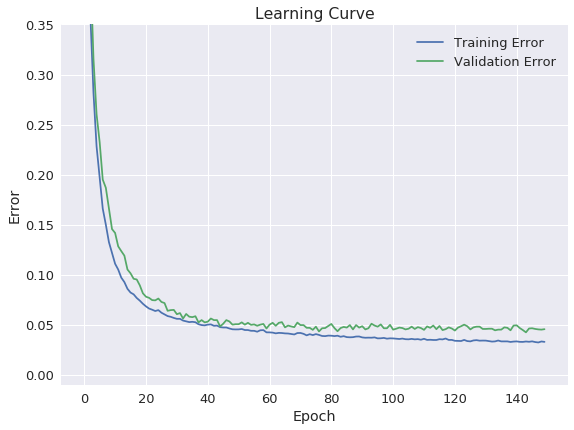

In [23]:
plt.figure(figsize=(8,6))
plt.title('Learning Curve')
plt.plot([1 - el[0] for el in errors])
plt.plot([1 - el[1] for el in errors])
plt.ylim([-.01,0.35])
plt.legend(['Training Error','Validation Error'])
plt.tight_layout()
plt.savefig('plots/learning_curve.png')
plt.ylabel('Error')
plt.xlabel('Epoch');

###  Accuracy Model for training validatio and test images

In [24]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./models'))
    print('Accuracy Model On Training Images: {:.2f}'.format(evaluate(X_train,y_train)))
    print('Accuracy Model On Validation Images: {:.2f}'.format(evaluate(X_valid,y_valid))) 
    print('Accuracy Model On Test Images: {:.2f}'.format(evaluate(X_test,y_test)))

INFO:tensorflow:Restoring parameters from ./models/lenet
Accuracy Model On Training Images: 0.97
Accuracy Model On Validation Images: 0.95
Accuracy Model On Test Images: 0.94


### Step 3: Test a Model on New Images
To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find signnames.csv useful as it contains mappings from the class id (integer) to the actual sign name.

In [25]:
import skimage
from skimage import io
from skimage import transform
from skimage.filters import gaussian
import glob

### Load and display the images

./signs/double_curve.png
./signs/children_crossing.jpg
./signs/80_km_limit.jpg


/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


./signs/50_km_limit.jpg
./signs/go_straigth_or_left.jpg


/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


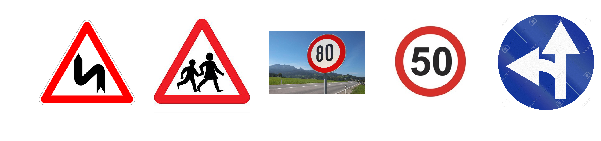

In [26]:

i=1
plt.figure(figsize=(12,10))
for el in glob.glob('./signs/*.png') + glob.glob('./signs/*.jpg'):
    print(el)
    img = io.imread(el)    
    plt.subplot(1,6,i)
    plt.imshow(img)
    i+=1
    plt.axis('off')
    
    img = transform.resize(img,(32,32), order=3)
    img = gaussian(img,.4,multichannel=True)
    
plt.savefig('plots/new_images.png',bbox_inches='tight')

### Predict the sign type for each images

In [27]:
# Read the images
i=1
images_wild = list()
labels_wild = list()
for line in open('signs/data.txt','r'):
    fname, label = line.strip().split(' ')
    label = int(label)
    fname = 'signs/'+fname
    img = io.imread(fname)    
    img = transform.resize(img,(32,32), order=3)
    img = gaussian(img,.6,multichannel=True)*255
    img = transform_img(img.astype(np.uint8))
    
    img.shape = (1,) + img.shape + ( 1,)
    images_wild.append(img)
    labels_wild.append(label)

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [28]:
images = np.concatenate(images_wild,axis=0)

In [29]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./models'))
    
    predicted_proba = np.vstack(predict(images))

    print('Accuracy Model On Internet Images: {}'.format(evaluate(images, labels_wild)))

INFO:tensorflow:Restoring parameters from ./models/lenet
Accuracy Model On Internet Images: 0.1666666716337204


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [30]:

for true_label,row in zip(labels_wild,predicted_proba):
    top5k = np.argsort(row)[::-1][:5]
    top5p = np.sort(row)[::-1][:5]
    print('Top 5 Labels for image \'{}\':'.format(get_name_from_label(true_label)))
    for k,p in zip(top5k,top5p):
          print(' - \'{}\' with prob = {:.2f} '.format(get_name_from_label(k),p))

Top 5 Labels for image 'Double curve':
 - 'Road work' with prob = 0.96 
 - 'Dangerous curve to the right' with prob = 0.01 
 - 'Right-of-way at the next intersection' with prob = 0.01 
 - 'Traffic signals' with prob = 0.01 
 - 'Double curve' with prob = 0.00 
Top 5 Labels for image 'Children crossing':
 - 'Speed limit (60km/h)' with prob = 0.99 
 - 'Speed limit (50km/h)' with prob = 0.01 
 - 'Speed limit (80km/h)' with prob = 0.00 
 - 'Speed limit (30km/h)' with prob = 0.00 
 - 'Speed limit (120km/h)' with prob = 0.00 
Top 5 Labels for image 'Speed limit (50km/h)':
 - 'Speed limit (50km/h)' with prob = 0.97 
 - 'Speed limit (80km/h)' with prob = 0.02 
 - 'Speed limit (30km/h)' with prob = 0.01 
 - 'Speed limit (60km/h)' with prob = 0.00 
 - 'Speed limit (100km/h)' with prob = 0.00 
Top 5 Labels for image 'Stop':
 - 'Go straight or right' with prob = 0.59 
 - 'Yield' with prob = 0.10 
 - 'Children crossing' with prob = 0.10 
 - 'Ahead only' with prob = 0.10 
 - 'Dangerous curve to the r

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
for true_label,row in zip(labels_wild,predicted_proba):
    top5k = np.argsort(row)[::-1][:5]
    top5p = np.sort(row)[::-1][:5]
    print('Top 5 Labels for image \'{}\':'.format(get_name_from_label(true_label)))
    for k,p in zip(top5k,top5p):
          print(' - \'{}\' with prob = {:.2f} '.format(get_name_from_label(k),p))


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")